<a href="https://colab.research.google.com/github/Nehalokesh/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/drive/mydrive/almabetter/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/content/drive/mydrive/almabetter/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /content/drive/mydrive/almabetter/temp/, but they won't be saved outside of the current session

# **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Load the Dataset**

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_check_ps.wav',
 '/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_chain_ps.wav',
 '/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_gaze_ps.wav',
 '/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_dodge_ps.wav',
 '/content/drive/MyDrive/Almabetter/Module 7/Capstone Project /archive.zip (Unzipped Files)/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_ring_ps.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

# **Data Preparation**

* As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
* We will use this dataframe to extract features for our model training.

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Almabetter/Module 7/Cap...,ps
1,/content/drive/MyDrive/Almabetter/Module 7/Cap...,ps
2,/content/drive/MyDrive/Almabetter/Module 7/Cap...,ps
3,/content/drive/MyDrive/Almabetter/Module 7/Cap...,ps
4,/content/drive/MyDrive/Almabetter/Module 7/Cap...,ps


In [ ]:
df['label'].value_counts()

ps         400
fear       400
angry      400
neutral    400
happy      400
disgust    400
sad        400
Name: label, dtype: int64

# **Exploratory Data Analysis**

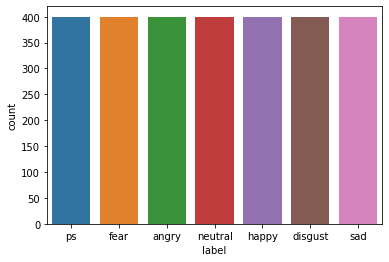

In [ ]:
sns.countplot(df['label'])

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

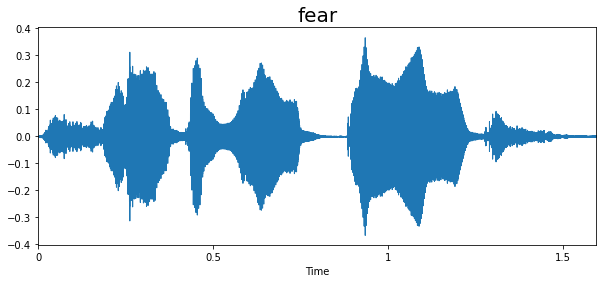

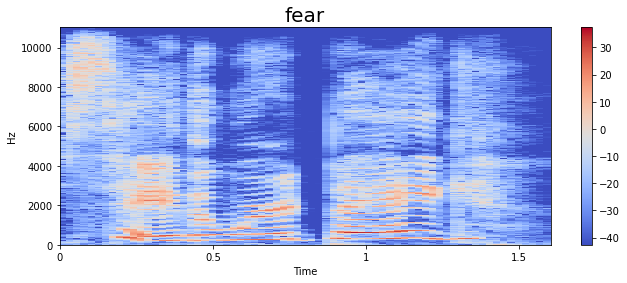

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

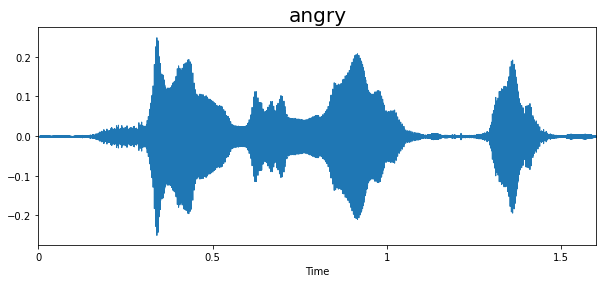

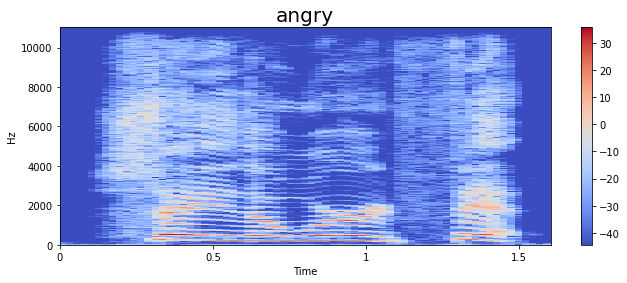

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

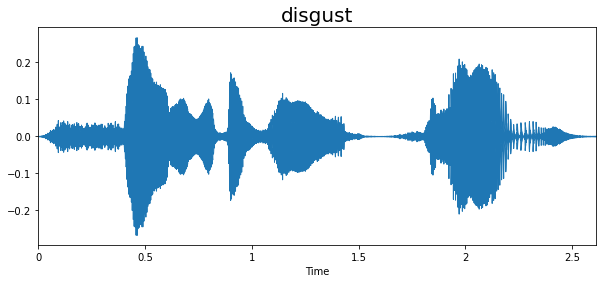

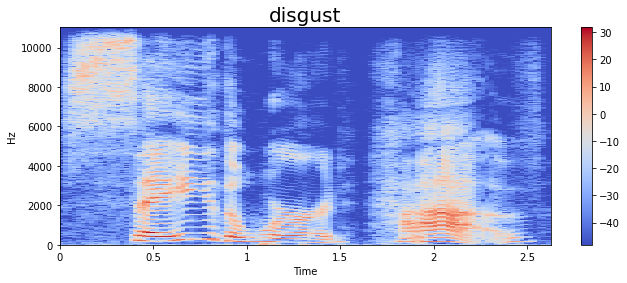

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

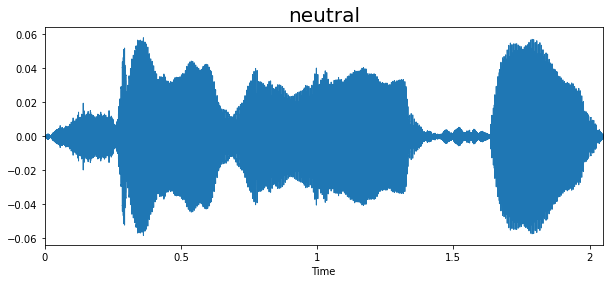

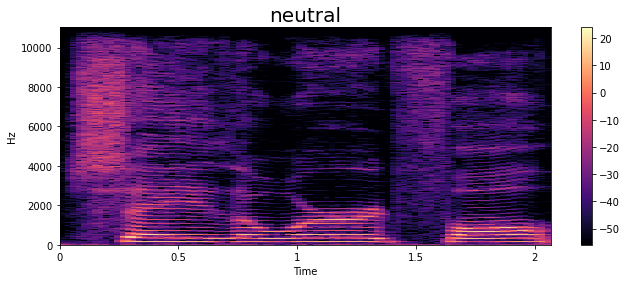

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

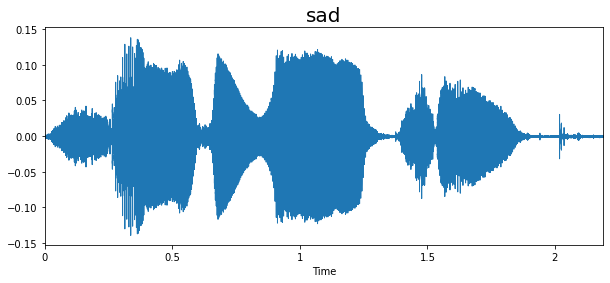

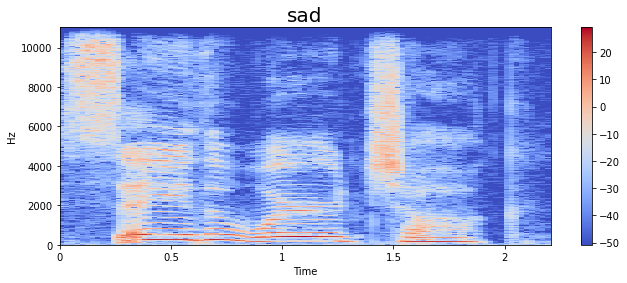

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

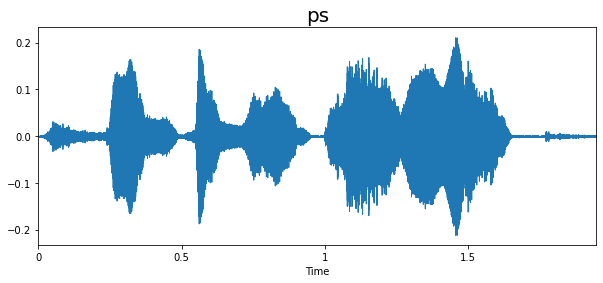

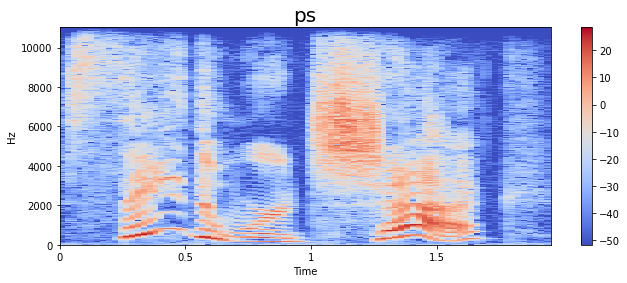

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

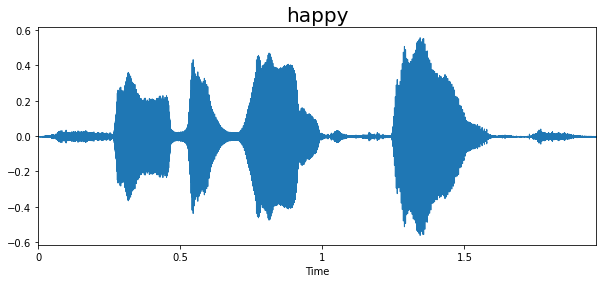

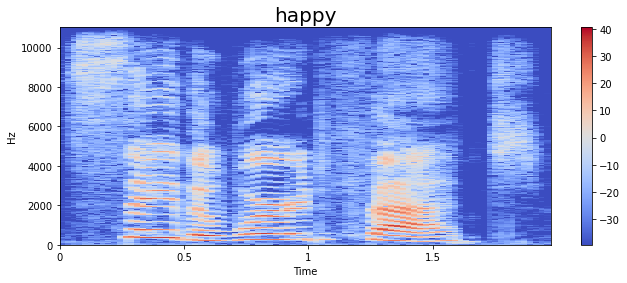

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction**

* Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.51244873e+02,  3.47918816e+01, -2.43772831e+01,  1.02578125e+01,
       -2.08644524e+01,  3.94009113e+00, -1.10730448e+01, -7.23339415e+00,
       -3.70598388e+00, -1.08683777e+00, -1.59114933e+01,  5.85247135e+00,
       -5.14555788e+00,  9.44608021e+00, -1.67069829e+00,  4.85801649e+00,
        5.09579706e+00,  7.31214619e+00, -1.83145821e+00,  8.46740627e+00,
        2.79006094e-01,  4.22266531e+00, -3.64480257e+00,  5.29464769e+00,
        4.91229206e-01,  2.49355340e+00,  1.23622648e-01,  2.05325079e+00,
        1.61451828e+00,  1.21766114e+00, -2.24089578e-01,  7.64453506e+00,
        3.39833498e+00,  7.60872412e+00,  4.03774071e+00,  8.32528877e+00,
        3.70287824e+00,  3.96732855e+00,  3.89761472e+00,  5.49765635e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-351.24487, 34.79188, -24.377283, 10.2578125,...
1       [-364.1436, 47.393562, -9.991677, 32.890438, -...
2       [-379.3074, 48.36505, 8.943276, 18.65608, -16....
3       [-346.87543, 52.099987, -11.057314, 5.643582, ...
4       [-350.416, 89.05234, -13.038918, 1.8581958, -1...
                              ...                        
2795    [-422.50797, 84.1813, -4.572695, 38.229477, 0....
2796    [-417.53806, 97.45515, 4.1209564, 34.8897, 5.5...
2797    [-488.8399, 118.07757, 29.963863, 18.320562, -...
2798    [-403.3598, 86.47987, 0.6431639, 28.17492, -3....
2799    [-423.75073, 73.32352, 3.1032968, 16.339981, 5...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

# **Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 13s 268ms/step - loss: 1.2547 - accuracy: 0.5040 - val_loss: 0.9654 - val_accuracy: 0.5661
Epoch 2/50
35/35 [==============================] - 6s 172ms/step - loss: 0.3752 - accuracy: 0.8732 - val_loss: 1.4967 - val_accuracy: 0.6893
Epoch 3/50
35/35 [==============================] - 6s 170ms/step - loss: 0.2419 - accuracy: 0.9223 - val_loss: 0.7356 - val_accuracy: 0.8196
Epoch 4/50
35/35 [==============================] - 6s 166ms/step - loss: 0.1627 - accuracy: 0.9496 - val_loss: 0.8387 - val_accuracy: 0.7893
Epoch 5/50
35/35 [==============================] - 6s 172ms/step - loss: 0.1020 - accuracy: 0.9723 - val_loss: 1.3294 - val_accuracy: 0.7393
Epoch 6/50
35/35 [==============================] - 6s 178ms/step - loss: 0.0886 - accuracy: 0.9732 - val_loss: 1.6499 - val_accuracy: 0.7250
Epoch 7/50
35/35 [==============================] - 6s 165ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 1.8475 - val_accuracy: 0.6946
Epoch

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

# **Plot the results**

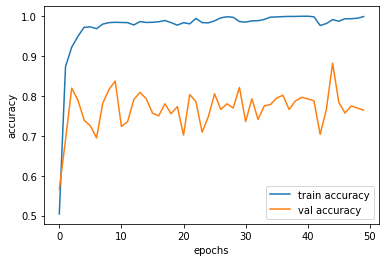

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

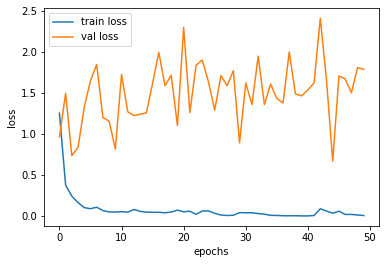

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Conclusion**

* We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..

* We overall achieved 61% accuracy on our test data and its decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.